In [1]:
# all neccessary library
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
train_dataset = pd.read_csv('mnist_train.csv')
test_dataset = pd.read_csv('mnist_test.csv')

# EXPLORE DATASETS

In [3]:
train_dataset.shape

(59999, 785)

In [4]:
test_dataset.shape

(9999, 785)

In [5]:
train_dataset.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_dataset.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test_dataset.columns

Index(['7', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.658', '0.659', '0.660', '0.661', '0.662', '0.663', '0.664', '0.665',
       '0.666', '0.667'],
      dtype='object', length=785)

In [11]:
train_dataset.columns

Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.608', '0.609', '0.610', '0.611', '0.612', '0.613', '0.614', '0.615',
       '0.616', '0.617'],
      dtype='object', length=785)

In [12]:
# lets rename the label column to label for both dataset
train_dataset = train_dataset.rename(columns={'5':'labels'})
test_dataset = test_dataset.rename(columns={'7':'labels'})

In [14]:
train_dataset.head()

,labels,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
test_dataset.head()

,labels,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_labels = np.array(train_dataset['labels'])
test_labels = np.array(test_dataset['labels'])

In [17]:
#drop the labels
train_dataset = train_dataset.drop(columns=['labels'])
test_dataset = test_dataset.drop(columns = ['labels'])

In [18]:
#get the 0th shape which is all the rows and extract their values
# reshape into 59999, 28X28 dataframe and converting into an numpy array 
train_dataset = np.array(train_dataset.values.reshape(train_dataset.shape[0],28,28))
test_dataset = np.array(test_dataset.values.reshape(test_dataset.shape[0],28,28))

In [19]:
test_dataset.shape

(9999, 28, 28)

In [20]:
# view the new shape
train_dataset.shape

(59999, 28, 28)

In [21]:
# Display a shapes
for i in range(28):
    for j in range(28):
        print('%3d'%train_dataset[1][i,j], end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232  39   0   0   0   0   0 
  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 180  39   0   0   0   0   0 
  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2 153 210  40   0   0   0   0   0 
  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   0   0   0   0  27 254 162   0   0 

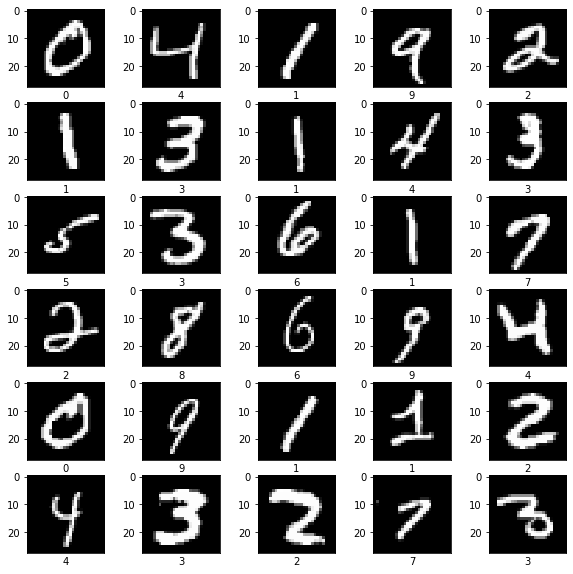

In [22]:
# display some images
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.grid(False)
    plt.imshow(train_dataset[i], cmap=plt.cm.gray)
    plt.xlabel(train_labels[i])
plt.show()

In [23]:
# rescaling the numbers
train_dataset = train_dataset/255.0
test_dataset = test_dataset/255.0

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(train_dataset, train_labels, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4334 - accuracy: 0.8800
Epoch 2/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1182 - accuracy: 0.9662
Epoch 3/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0760 - accuracy: 0.9779
Epoch 4/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0557 - accuracy: 0.9826
Epoch 5/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0422 - accuracy: 0.9875
Epoch 6/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0334 - accuracy: 0.9898
Epoch 7/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0249 - accuracy: 0.9927
Epoch 8/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0210 - accuracy: 0.9934
Epoch 9/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0153 - accuracy: 0.9956
Epoch 10/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

In [27]:
predictions = model.predict(test_dataset)
predLabels=[]
for pr in predictions:
    predLabels.append(np.argmax(pr))

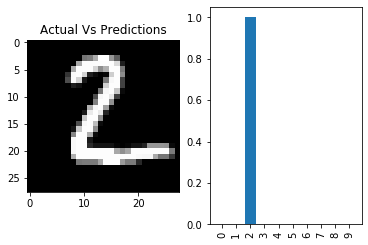

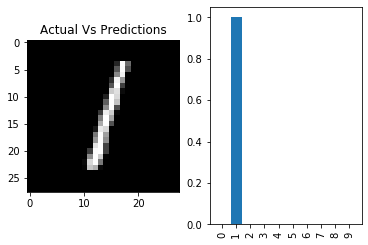

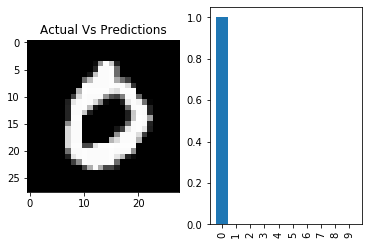

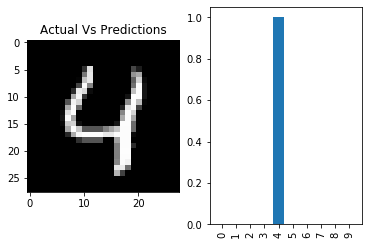

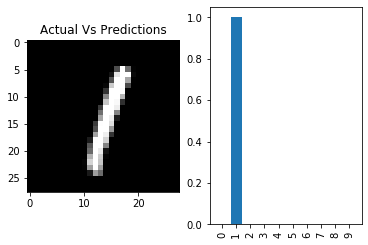

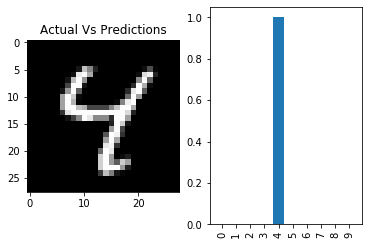

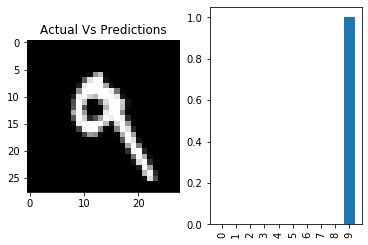

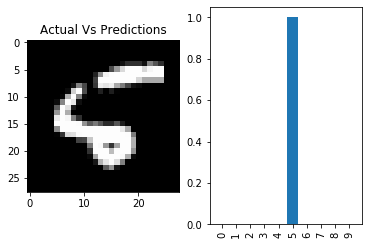

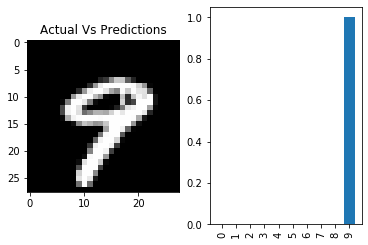

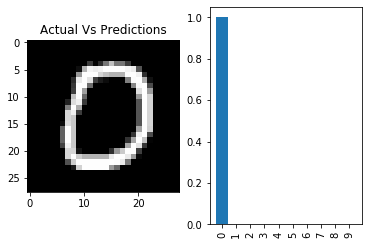

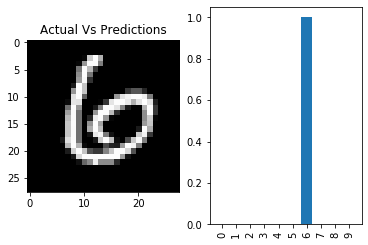

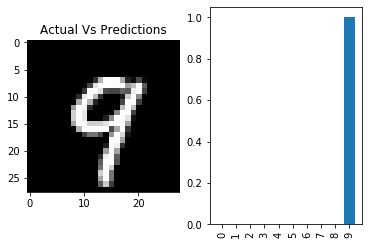

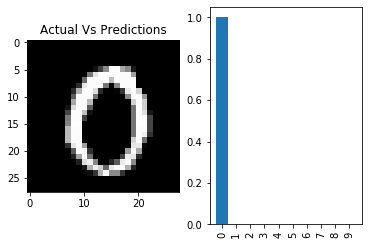

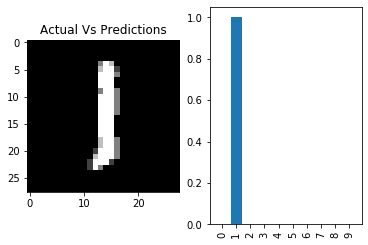

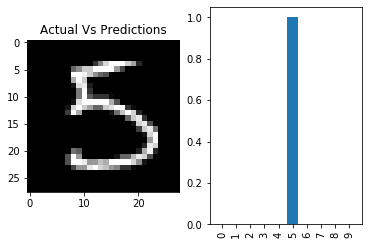

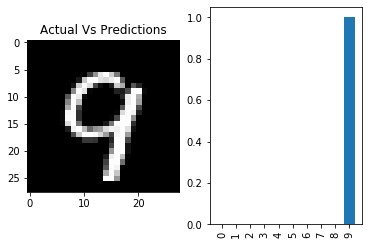

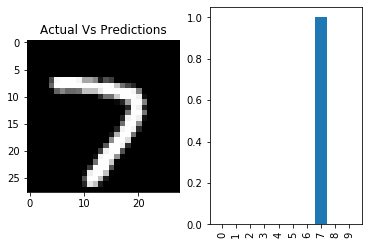

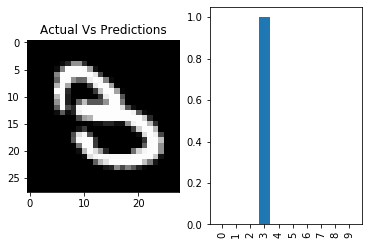

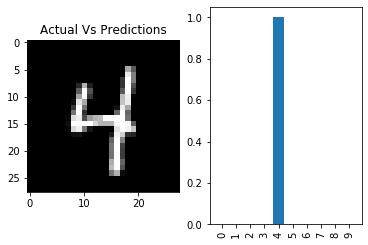

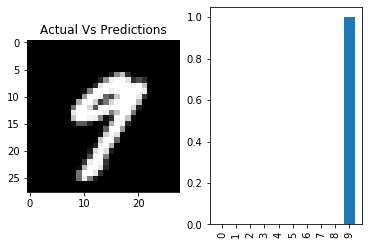

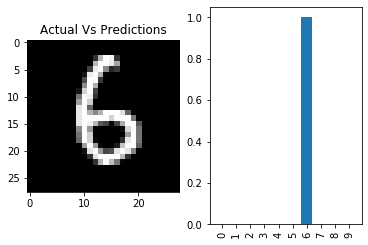

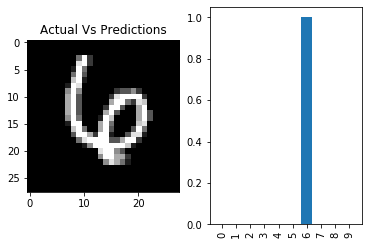

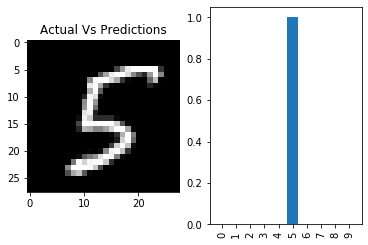

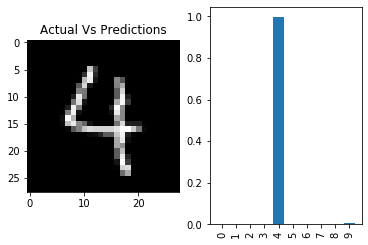

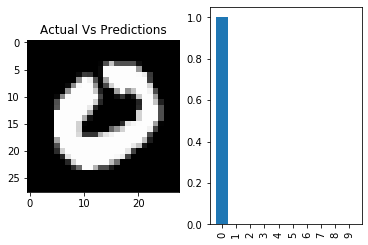

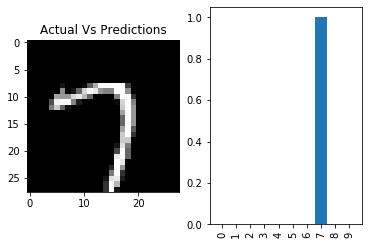

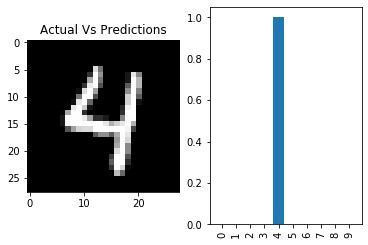

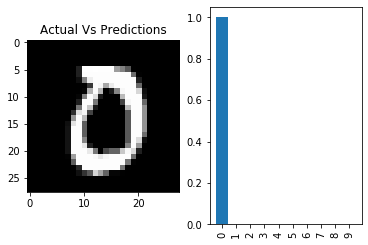

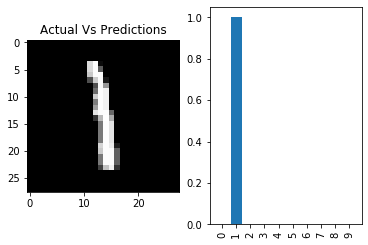

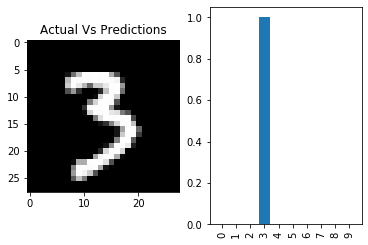

In [28]:
for i in range(30):
    plt.subplot(1,2,1)
    plt.imshow(test_dataset[i], cmap=plt.cm.gray)
    plt.title('Actual Vs Predictions')
    plt.subplot(1,2,2)
    plt.bar(range(len(predictions[i])),predictions[i])
    #ax.set_xticks(range(len(predictions[0])))
    plt.xticks(range(len(predictions[i])), rotation='vertical')
    plt.show()

In [29]:
print(confusion_matrix(test_labels, predLabels))

[[ 968    0    0    1    3    1    1    2    1    3]
 [   0 1123    3    2    0    2    2    1    2    0]
 [   1    2 1001    4    2    0    2   11    7    2]
 [   0    0    3  993    0    4    0    2    1    7]
 [   0    0    5    0  929    1    5    1    1   40]
 [   2    0    0    6    0  874    4    2    2    2]
 [   6    2    0    1    2    8  935    1    2    1]
 [   0    4    6    2    1    0    0 1003    3    8]
 [   5    0    6    6    2    6    1    4  939    5]
 [   1    3    0    4    3    1    1    4    0  992]]


In [30]:
print(classification_report(test_labels, predLabels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.95      0.97       982
           5       0.97      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1027
           8       0.98      0.96      0.97       974
           9       0.94      0.98      0.96      1009

    accuracy                           0.98      9999
   macro avg       0.98      0.98      0.98      9999
weighted avg       0.98      0.98      0.98      9999



In [31]:
print(np.array(predLabels[0:20]))
print(test_labels[0:20])

[2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9]
[2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9]
